> **Assignment 3**
>
> **Assignment 3: Evolutionary Algorithms**
>
> **Goal**: Get familiar with evolutionary algorithms by implementing it
> and applying it to a given non-differentiable optimization task.
>
> In this assignment, we are going to learn about evolutionary
> algorithms (EAs). The goal is to implement components of an
> evolutionary algorithm: a recombination operator, a mutation operator,
> and selection mechanisms, and analyze their behavior. This assignment
> is open to any choice of the aforementioned components as long as they
> are well motivated.
>
> We are interested in optimizing a given **black-box** function that
> could be queried (i.e., it returns a value of the objective for given
> input values), but the gradient wrt the input cannot be calculated.
> The input to the system is a vector:

*x*=\[*α* 0*,n,β ,α* \]*⊤∈* \[*−*2*,*10\]*×* \[0*,*10 \]*×*\[*−*5*,*20\]
*×*\[500*,*2500 \]*.*

> The optimized function is based on the gene repressilator model. For
> details, please see Section 4.2 in HERE.
>
> **1. Understanding the problem**

The considered problem is about finding parameter values of a model
widely used in biology, namely, the gene repressilator model. This model
represents a simple network in which a gene (mRNA) is produced by a
protein, and then this gene is used to produce another protein.
Altogether, there are 3 genes and 3 proteins that are connected as
follows: *m*1*→ p*1, *p*1*→m*2, *m*2*→ p*2, *p*2*→m*3, *m*3*→ p*3,
*p*3*→m*1.

> Please run the code below and spend a while on analyzing the signals
> in the model. Think of the osscilatory character of the signals.
>
> If any code line is unclear to you, please read on that in numpy or
> matplotlib docs.
>
> import pickle  
> import copy  
> import numpy as np  
> import matplotlib.pyplot as plt  
> from scipy.integrate import solve_ivp
>
> EPS =1.e-7
>
> *\# PLEASE DO NOT REMOVE!*
>
> *\# This is the main class for the gene repressilator model.*
>
> *\# There is no need to understand how it works! You can treat it as a
> black-box.*
>
> *\# It is important to realize that we can always ask this object to
> give us*
>
> *\# an evaluation of given parameter values.*
>
> **class** Repressilator(object):  
> **def**\_\_init\_\_(self, y_real, params): super().\_\_init\_\_()  
> self.y_real = y_real.copy()  
> self.params = params.copy()
>
> *\# The definition of the gene repressilator model as a system of
> ODEs.*
>
> **def** repressilator_model(self, t, y):  
> m1, m2, m3, p1, p2, p3 = y\[0\], y\[1\], y\[2\], y\[3\], y\[4\],
> y\[5\]
>
> alpha0 =self.params\['alpha0'\]  
> n =self.params\['n'\]  
> beta =self.params\['beta'\]  
> alpha =self.params\['alpha'\]
>
> dm1_dt =-m1 + alpha / (1.+ p3\*\*n) + alpha0 dp1_dt =-beta \* (p1 -
> m1)  
> dm2_dt =-m2 + alpha / (1.+ p1\*\*n) + alpha0 dp2_dt =-beta \* (p2 -
> m2)  
> dm3_dt =-m3 + alpha / (1.+ p2\*\*n) + alpha0 dp3_dt =-beta \* (p3 -
> m3)
>
> **return** dm1_dt, dm2_dt, dm3_dt, dp1_dt, dp2_dt, dp3_dt
>
> *\# A numerial solver for the model (here we use Runge-Kutta 4.5)*
> **def** solve_repressilator(self):  
> *\# we need to use lambda function if we want to pass some*  
> *parameters*  
> solution = solve_ivp(**lambda** t, y: self.repressilator_model(t, y),
> t_span=(self.params\['t0'\],  
> self.params\['t1'\]),  
> y0=self.params\['y0'\],  
> method='RK45',  
> t_eval=self.params\['t_points'\])  
> y_points = np.asarray(solution.y)  
> **return**self.params\['t_points'\], y_points
>
> *\# An auxiliary function: setting parameters.*
>
> **def** set_params(self, x):  
> self.params\['alpha0'\] = x\[0\]  
> self.params\['n'\] = x\[1\]  
> self.params\['beta'\] = x\[2\]  
> self.params\['alpha'\] = x\[3\]
>
> *\# Calculating the objective function.*
>
> *\# Here, we use the Euclidean distance between the real data and the
> synthetic data.*
>
> @staticmethod  
> **def** loss(y_real, y_model):  
> *\# we assume only m's are observed!*
>
> y_r = y_real\[0:3\]  
> y_m = y_model\[0:3\]  
> **if** y_r.shape\[1\] == y_m.shape\[1\]:  
> **return** np.mean(np.sqrt(np.sum((y_r - y_m)\*\*2, 0))) **else**:  
> **return** np.infty
>
> **def** objective(self, x):  
> **if** len(x.shape) \>1:  
> objective_values = \[\]  
> **for** i **in** range(x.shape\[0\]):  
> xi = x\[i\]  
> self.set_params(xi)
>
> \_, y_model =self.solve_repressilator()  
> objective_values.append(self.loss(self.y_real, y_model))
>
> objective_values = np.asarray(objective_values) **else**:  
> self.set_params(x)
>
> \_, y_model =self.solve_repressilator()  
> objective_values =self.loss(self.y_real, y_model)
>
> **return** objective_values
>
> *\# PLEASE DO NOT REMOVE!*
>
> *\# Initialize the problem.*
>
> *\# Here we set the real parameters and generate "real" data. To make
> the problem*  
> *\# more realistic, we add a small Gaussian noise.*
>
> params = {}  
> params\['alpha0'\] =1.1  
> params\['n'\] =2.9  
> params\['beta'\] =5.5  
> params\['alpha'\] =500  
> params\['t0'\] =0.
>
> params\['t1'\] =60.5  
> params\['t_points'\] = np.asarray(\[ 0. , 0.5, 1. , 1.5, 2. , 2.5, 3.
> , 3.5,  
> 4. , 4.5, 5. , 5.5, 6. , 6.5, 7.
>
> , 7.5,  
> 8. , 8.5, 9. , 9.5, 10. , 10.5, 11. , 11.5,  
> 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,  
> 16. , 16.5, 17. , 17.5, 18. , 18.5,
>
> 19\. , 19.5,  
> 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5,  
> 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,  
> 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5,  
> 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5,  
> 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5,  
> 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,  
> 44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5,  
> 48. , 48.5, 49. , 49.5, 50. , 50.5, 51. , 51.5,  
> 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5,  
> 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5\])  
> params\['x0'\] = np.asarray(\[\[5.64167522, 2.07180539, 3.56690274,
> 7.0015145 \]\])  
> params\['y0'\] = np.asarray(\[0.0, 0.0, 0.0, 2.0, 1.0, 3.0\])
>
> *\# Generate "real" data*  
> r = Repressilator(\[0\], params)  
> \_, y_real = r.solve_repressilator()  
> **del**(r) *\# we remove the object, just in case*  
> y_real = y_real + np.random.randn(\*y_real.shape) \*5.*\# add noise!*
>
> *\# PLEASE DO NOT REMOVE*  
> *\# Here, we plot all signals in the model.*
>
> *\# Note that later on, we assume that only gene expression (i.e., m1,
> m2, m3)*  
> *\# are observed (blue plots) and proteins (i.e. p1, p2, p3) are
> unobserved (in red).*
>
> t = params\['t_points'\]
>
> fig_data, axs = plt.subplots(2,3,figsize=(20, 4))
> fig_data.tight_layout()
>
> **for** i **in** range(2):  
> **for** j **in** range(3):  
> **if** i ==0:  
> title ='m'  
> color ='b'  
> **else**:  
> title ='p'  
> color ='r'
>
> axs\[i,j\].plot(t, y_real\[2\*i+j\], color) axs\[i,j\].set_title(title
> + str(j+1))
>
> 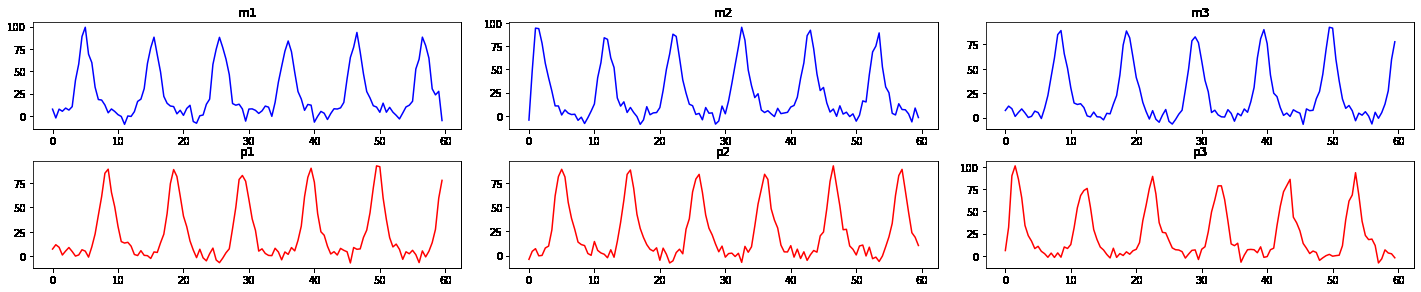
>
> **2. Evolutionary Algorithms**
>
> In this assignment, you are asked to implement an evolutionary
> algorithm (EA). Please take a look at the class below and fill in the
> missing parts. Please keep in mind that you are free to choose any
> operations as lons as they are appropriate for evolutionary
> algorithms.
>
> NOTE: Please pay attention to the inputs and outputs of each function.
>
> **Question 1 (0-0.5pt):** Do you use a mutation operator? If yes,
> please explain in detail your choice. If not, please explain why not.
>
> **Answer:** Yes, a mutation operator will be used in the evolutionary
> algorithm. Random pertubation are added to the population to introduce
> mutation in the population. As the data has a continuous
> representation.
>
> **Question 2 (0-0.5pt):** Do you use a cross-over operator? If yes,
> please explain in detail your choice. If not, please explain why not.
>
> **Answer:** Recombination (or cross-over) is also implementen into the
> evolutionary algorithm. For this multipoint crossover is chosen to be
> implemented.
>
> **Question 3 (0-0.5pt):** What kind of selection mechanism do you use?
> Please explain in detail and motivation your choice.
>
> **Answer:** The selection method that will be implemented into the
> algorithm are subdived in parent selection and survivor selection. For
> parents the fintness values are used for proportional selection. For
> the survivors the choice is for Elitism. So, the best best individuals
> consitute the new population.
>
> **Question 4 (0-0.5pt):** Do you use any other operation? If yes,
> please explain and motivate your choice.
>
> **Answer:** No, no other operation are implemented into the
> evolutionary algorithm
>
> **Question 5 (0-0.5-1pt):** Please provide a pseudo-code for your
> evolutionary algorithm. Please try to be as formal as possible!
>
> **Answer:**
>
> 1\. Initiliaze the population (generation size, min/max bounds,

<table>
<thead>
<tr class="header">
<th>2.</th>
<th><blockquote>
<p>Ge</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>3.</td>
<td><blockquote>
<p>Generate intial population</p>
</blockquote></td>
</tr>
<tr class="even">
<td>4.</td>
<td><blockquote>
<p>Repeat until max number generations is reached</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>5.</td>
<td><blockquote>
<p>Parents selection based on elitism</p>
</blockquote></td>
</tr>
<tr class="even">
<td>6.</td>
<td><blockquote>
<p>Cross-over to create children based on n-point</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>7.</td>
<td>7. Introduce mutations from uniform disbrution given in the bounds</td>
</tr>
<tr class="even">
<td>8.</td>
<td><blockquote>
<p>Fitness of children is calculated</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>9.</td>
<td><blockquote>
<p>Select the best survivior based on elitism</p>
</blockquote></td>
</tr>
</tbody>
</table>

> 10\. if max number generation is reached go to line 11 else return to
> line 4.
>
> 11\. After termination return best solution.
>
> *\#=========*  
> *\# GRADING:*  
> *\# 0*  
> *\# 0.5 pt if code works but some functions are incorrect and it is
> badly explained*  
> *\# 1.0 pt if code works but some functions are incorrect*  
> *\# 2.0 pt if code works but it does not correspond to the description
> above and it is badly explained*  
> *\# 2.5 pt if code works and it is well explained, but it does not
> correspond to the description above*  
> *\# 3.0 pt if code works and it is aligned with the description about,
> but it is badly explained*  
> *\# 3.5 pt if code works and it is aligned with the description about,
> and it is well explained*  
> *\# 4.0 pt if code works, it is as it was described, it is well*  
> *explained, and the proposed operations are beyond the lecture!*
>
> *\#=========*  
> *\# Implement the Evolutionary Algorithm (EA) algorithm.*
>
> *\# It is equivalent to implementing the step function.*
>
> **class** EA(object):  
> **def**\_\_init\_\_(self, repressilator, pop_size, child_size,  
> bounds_min=None, bounds_max=None):  
> self.repressilator = repressilator  
> self.pop_size = pop_size  
> self.bounds_min = bounds_min  
> self.bounds_max = bounds_max  
> *\#-------*  
> *\# PLEASE FILL IN*  
> *\# all necessary hyperparameters come here*  
> *\#-------*  
> *\#-------*  
> *\# PLEASE FILL IN*  
> *\# all necessary operations (e.g., mutation, selection) must come
> here.*
>
> *\#-------*
>
> **def** parent_selection(self, x_old, f_old):
>
> *\# Sort the fitness and selects best individuals*  
> ind = np.argsort(f_old)  
> x_parents = x_old\[ind\]  
> f_parents = f_old\[ind\]  
> *\# Elitism based selection*  
> **return** x_parents\[-self.pop_size:,:\],
> f_parents\[-self.pop_size:\]
>
> **def** recombination(self, x_parents, f_parents):  
> *\# Initilaze parameters*  
> *\# create array of children*  
> x_children = \[\]  
> **for** \_ **in** range(25):  
> *\# recombanation is randomized*  
> random_int = np.random.randint(4)  
> x_child = np.concatenate(\[x_parents\[i, :random_int\], x_parents\[i,
> random_int:\]\])  
> *\# array is appended by the concatenated recombination* x_children =
> np.append(x_children, x_child)  
> x_children = x_children.reshape(25, 4)
>
> **return** x_children  
> **def** mutation(self, x_children):  
> *\# Uniform random to introduce mutations*  
> x_children = (x_children + np.random.randn(x_children.shape\[0\],
> x_children.shape\[1\])) \*1.5  
> **return** x_children
>
> **def** survivor_selection(self, x_old, x_children, f_old,
> f_children): *\# concatenate new and old generations*  
> x_c = np.concatenate(\[x_old, x_children\], 0)  
> f_c = np.concatenate(\[f_old, f_children\])  
> ind = np.argsort(f_c)  
> index =\[\]  
> *\#pick the mu best values in the generation*  
> **for** i **in** range(len(f_old)):  
> index.append(ind\[i\])  
> x = x_c\[index\]  
> f = f_c\[index\]  
> **return** x, f
>
> *\# Evaluation step: DO NOT REMOVE!*  
> **def** evaluate(self, x):
>
> **return**self.repressilator.objective(x)  
> **def** step(self, x_old, f_old):  
> *\#-------*  
> *\# PLEASE FILL IN*  
> *\#* **NOTE***: This function must return x, f*  
> *\# where x - population*  
> *\# f - fitness values of the population* *\#-------*
>
> x_parents, f_parents =self.parent_selection(x_old, f_old)
>
> x_children =self.recombination(x_parents, f_parents)
>
> x_children =self.mutation(x_children)
>
> f_children =self.evaluate(x_children)
>
> x, f =self.survivor_selection(x_old, x_children, f_old, f_children)  
> **return** x, f
>
> **NOTE 1**
>
> Since this assignment allows you implementing your own operations,
> this is difficult to prepare a code for that. Therefore, please use
> the code below to find the best set of your hyperparameters in a
> separate file, and then present your analysis for the best valyes of
> the hyperparameters here.
>
> **NOTE 2**
>
> Additionally, please do try various population sizes (25, 50, 100,
> ...). You will be asked about it later.
>
> *\# PLEASE DO NOT REMOVE!*
>
> num_generations =50*\# if necessary, please increase the number of
> generations*  
> pop_size =150  
> bounds_min = \[-2., 0., -5., 500.\]  
> bounds_max = \[10., 10., 20., 2500.\]  
> *\#-------*  
> *\# PLEASE FILL IN!*
>
> *\# Your hyperparams go here.*
>
> *\# PLEASE USE THE VALUES OF THE HYPERPARAMETERS FOR WHICH YOU
> OBTAINED THE BEST RESULTS.*
>
> *\# DO NOT ITERATE OVER THEM!*
>
> *\#-------*
>
> *\# Initialize the repressilator*  
> repressilator = Repressilator(y_real, params)
>
> *\#-------*  
> *\# PLEASE FILL IN!*
>
> *\# Your object goes here:*  
> ea = EA(repressilator, pop_size, bounds_min, bounds_max) *\#-------*
>
> *\# Init the population*  
> x = np.random.uniform(low=bounds_min, high=bounds_max, size=(pop_size,
> 4))  
> f = ea.evaluate(x)
>
> *\# We want to gather populations and values of the best candidates to
> further*  
> *\# analyze the algorithm.*
>
> populations = \[\]  
> populations.append(x)  
> f_best = \[f.min()\]
>
> *\# Run the EA.*
>
> **for** i **in** range(num_generations):  
> **if** i % int(num_generations \*0.1) ==0:  
> print('Generation: {}, best fitness: {:.2f}'.format(i, f.min())) x, f
> = ea.step(x, f)  
> populations.append(x)  
> **if** f.min() \< f_best\[-1\]:  
> f_best.append(f.min())  
> **else**:  
> f_best.append(f_best\[-1\])  
> print('FINISHED!')
>
> C:\\Users\\chere\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py:21:
> RuntimeWarning: invalid value encountered in double_scalars  
> C:\\Users\\chere\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py:23:
> RuntimeWarning: invalid value encountered in double_scalars  
> C:\\Users\\chere\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py:25:
> RuntimeWarning: invalid value encountered in double_scalars
>
> Generation: 0, best fitness: 37.34  
> Generation: 5, best fitness: 28.39  
> Generation: 10, best fitness: 28.39  
> Generation: 15, best fitness: 28.39  
> Generation: 20, best fitness: 28.39  
> Generation: 25, best fitness: 28.39  
> Generation: 30, best fitness: 28.39  
> Generation: 35, best fitness: 28.39  
> Generation: 40, best fitness: 28.39
>
> Generation: 45, best fitness: 28.39  
> FINISHED!
>
> *\# PLEASE DO NOT REMOVE*  
> *\# Generate signals for the best performing parameter values*
> repressilator.set_params(x\[f.argmin()\],)  
> t, y_best = repressilator.solve_repressilator()
>
> *\# Create plots*  
> fig_ea, axs = plt.subplots(2,3,figsize=(20, 4)) fig_ea.tight_layout()
>
> **for** i **in** range(2):  
> **for** j **in** range(3):  
> **if** i ==0:  
> title ='m'  
> color ='b'  
> color_m ='m'  
> **else**:  
> title ='p'  
> color ='r'  
> color_m ='c'  
> axs\[i,j\].plot(t, y_real\[2\*i+j\], color, label='Data')
> axs\[i,j\].plot(t, y_best\[2\*i+j\], color_m, label='EA')
> axs\[i,j\].set_title(title + str(j+1))  
> axs\[i,j\].legend()
>
> 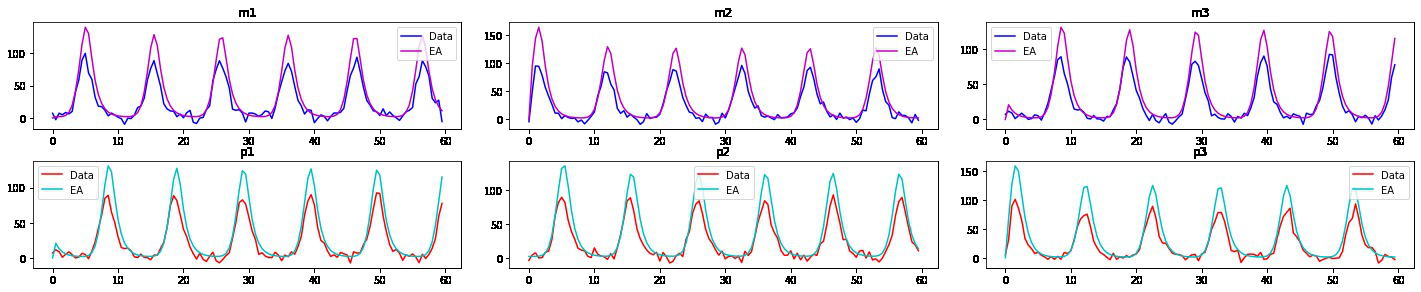
>
> *\# PLEASE DO NOT REMOVE*  
> *\# Generate scatterplots for the populations*  
> gens = \[0, num_generations//4, num_generations//2, num_generations\]
> fig_ea_pops, axs = plt.subplots(1,4,figsize=(16, 4))  
> fig_ea_pops.tight_layout()
>
> **for** i **in** range(len(gens)):  
> pop_i = populations\[gens\[i\]\]  
> axs\[0\].scatter(pop_i\[:,0\], pop_i\[:,1\], label=str(gens\[i\]))
> axs\[1\].scatter(pop_i\[:,0\], pop_i\[:,2\], label=str(gens\[i\]))
> axs\[2\].scatter(pop_i\[:,2\], pop_i\[:,3\], label=str(gens\[i\]))
> axs\[3\].scatter(pop_i\[:,1\], pop_i\[:,2\], label=str(gens\[i\]))
> axs\[0\].legend(), axs\[1\].legend(), axs\[2\].legend(),
> axs\[3\].legend() axs\[0\].set_title(r'\$\\alpha_0\$ vs. \$n\$')
>
> axs\[1\].set_title(r'\$\\alpha_0\$ vs. \$\\beta\$')
> axs\[2\].set_title(r'\$\\beta\$ vs. \$\\alpha\$')
> axs\[3\].set_title(r'\$n\$ vs. \$\\alpha\$')
>
> Text(0.5, 1.0, '\$n\$ vs. \$\\\\alpha\$')
>
> 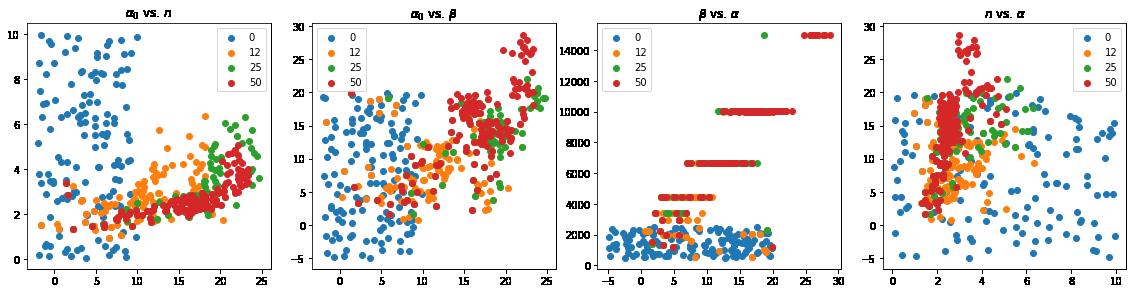
>
> *\# PLEASE DO NOT REMOVE*  
> *\# The convergence plot: the best value of the fitness function for
> each generation*  
> plt.plot(range(len(f_best)), f_best)  
> plt.title('The convergence')  
> plt.grid()
>
> 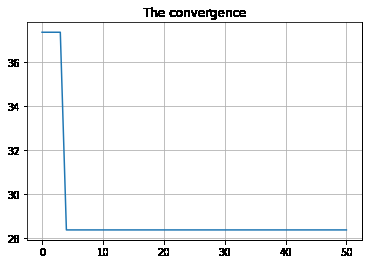
>
> **4. Final remarks: Analysis**
>
> Eventually, please answer the following last questions that will allow
> you to conclude the assignment.
>
> **Question 6 (0-0.5pt)**: After analyzing the results, do you think
> your algorithm discovered the real values of the parameters? Why?
> Please indicate which plots indicate that? If not, what is a potential
> explanation?
>
> **Answer**: The algorithm didn't discover the real values of the
> parameters. This can be seen plot of the data and EA as they don't
> look similair at all. Also, in the generation plots it ca be seen that
> the populationns aren't converging to specific a search space. A
> potential explenation is that there goes something wrog in the
> algorithm which results in not enough exploration of the search space
>
> **Question 7 (0-0.5pt)**: How the population influences the
> performance of evolutionary algorithms? What population sizes did you
> use?
>
> **Answer**: Population of the algorithm will influence the performanve
> postively. As this will give more samples to try parameters for the
> algorithm. Thus, resulting in better  
> performance. However, this doesn't mean that it will take longer for
> the algorithm to run.
>
> **Question 8 (0-0.5pt)**: What are the advantages of your approach?
>
> **Answer**: The advantages of my implemented algorithm is it doesn't
> account for dominace. Also the fitness values has invariance to
> transslation.
>
> **Question 9 (0-0.5pt)**: What are the drawbacks of your approach?
>
> **Answer**: The drawbacks of the algortihm is that there is dominace
> which can cause premature convergence. Other issues that remains is
> crowding. As my algorithm didn't really adjusted but remained in the
> same search space and resulted in the near constant fitness.
>
> **Question 10 (0-0.5pt)**: How could you improve convergence speed of
> your algorithm? Please provide very specific answer, ideally supported
> with literature and mathematical formulas.
>
> **Answer**: In the paper of Angelova & Pencheva et al. (2011) they
> researched to improve the covergenvce speed of evolutionary
> algorithms. However, an important facctor that must be accounted for
> is pre-mature convergence as this could prevent good performance.
> Having a big range of generations doesn't influence the performance
> much and could save time up to 40%. So, an age-based replacement could
> be implemented to imporve the convergence speed
>
> **Question 11 (0-0.5pt)**: How does an EA compares with the
> Metropolis-Hastings algorithm? What are the similarities? What are the
> differences?
>
> **Answer**: EA and MH are comparable as they both generate new
> samples/populations.
>
> Second, they evalute the new samples/populations through a evalution
> function(fitness, acceptance probability). Finally, the new samples
> are selecte through survival selection and probability function.
> However. they also differ in many ways. MH doesn't implement things
> like mutations, cross-over and more ellabarote selection methods like
> roullete wheel.